Dropping per 90 data (not needed any more since split dataset into per90 and percentile, also hard to average percentile)

In [1]:
# # drop per90

# # Initial number of columns
# initial_column_count = outfield_df.shape[1]

# # Drop columns with "Per90" in their name
# columns_to_drop = [col for col in outfield_df.columns if 'Per90' in col]
# outfield_df = outfield_df.drop(columns=columns_to_drop)

# # Final number of columns
# final_column_count = outfield_df.shape[1]
# columns_dropped = initial_column_count - final_column_count

# print(f"Number of columns before dropping 'Per90': {initial_column_count}")
# print(f"Number of columns after dropping 'Per90': {final_column_count}")
# print(f"Number of columns dropped: {columns_dropped}")

In [ ]:
# na_columns_goal_related = ['Percentile_Goals/Shot on Target', 
#                            'Percentile_npxG/Shot', 
#                            'Percentile_Average Shot Distance', 
#                            'Percentile_Goals/Shot', 
#                            'Percentile_Shots on Target %']
# na_columns_dribble_related = ['Percentile_Successful Take-On %',
#                               'Percentile_Tackled During Take-On Percentage']
# na_columns_others = ['Percentile_% of Dribblers Tackled',
#                      'Percentile_% of Aerials Won',
#                      'Percentile_Pass Completion % (Long)']
# # Fill missing values with 0 as corresponding player is not involved in those actions, suggesting they are not good at it.
# outfield_df[na_columns_goal_related] = outfield_df[na_columns_goal_related].fillna(0)
# outfield_df[na_columns_dribble_related] = outfield_df[na_columns_dribble_related].fillna(0)
# outfield_df[na_columns_others] = outfield_df[na_columns_others].fillna(0)

# Random Forest Model

In [22]:

# Define Features (X) and Target (y)
X = outfield_df.drop(columns=["Player", "player_market_value_euro"])  # Features
y = outfield_df["player_market_value_euro"]  # Target variable

# Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance Analysis
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx[:10])), feature_importance[sorted_idx[:10]], align='center')
plt.yticks(range(len(sorted_idx[:10])), [X.columns[i] for i in sorted_idx[:10]])
plt.xlabel("Feature Importance")
plt.title("Top 10 Most Important Features in Player Valuation")
plt.gca().invert_yaxis()
plt.show()

KeyError: "['Player', 'player_market_value_euro'] not found in axis"

# Clustering

## K Means

Custom Initial Cluster Centers:
 [[-0.83228853 -0.87247311  0.5642536  -0.17429018  0.63513893 -0.24269883
  -0.92372453 -0.64274234 -0.79544046  0.44785244  1.04216996 -0.1965841
  -0.82355517 -0.07820218  0.08176828  0.02965527 -0.63195423  0.96098139
  -0.83807865 -0.58405418 -0.64759693  0.17639425  0.53744164 -0.21204461
   0.23604494  0.74378611  0.53088403  0.73495711  0.88424741  0.7479002
   1.09779393  1.07400255  0.63692364  0.43153831 -0.04709992 -1.04807549
   0.49738385 -1.06509782  1.13959185  1.12606207  0.16491209  1.10143473
  -0.17800296 -0.27385794 -0.86589761 -0.22616669 -0.91732371 -0.9363004
  -1.11021473 -0.99106553 -1.08455657 -0.83978826  0.18266121 -1.08455499
  -0.98392461 -1.05209372 -0.86816039 -0.25085794 -0.79586445 -0.98064736
  -1.00655842  0.32107514  0.54505979 -0.56315484  0.51814791  0.76585004
   0.73260298 -0.30948158 -0.754818    1.0266678  -1.0810996  -0.14065715
  -0.20186009  0.14193222  0.86495824  0.47716631  1.03219133  0.99507838
  -0.107

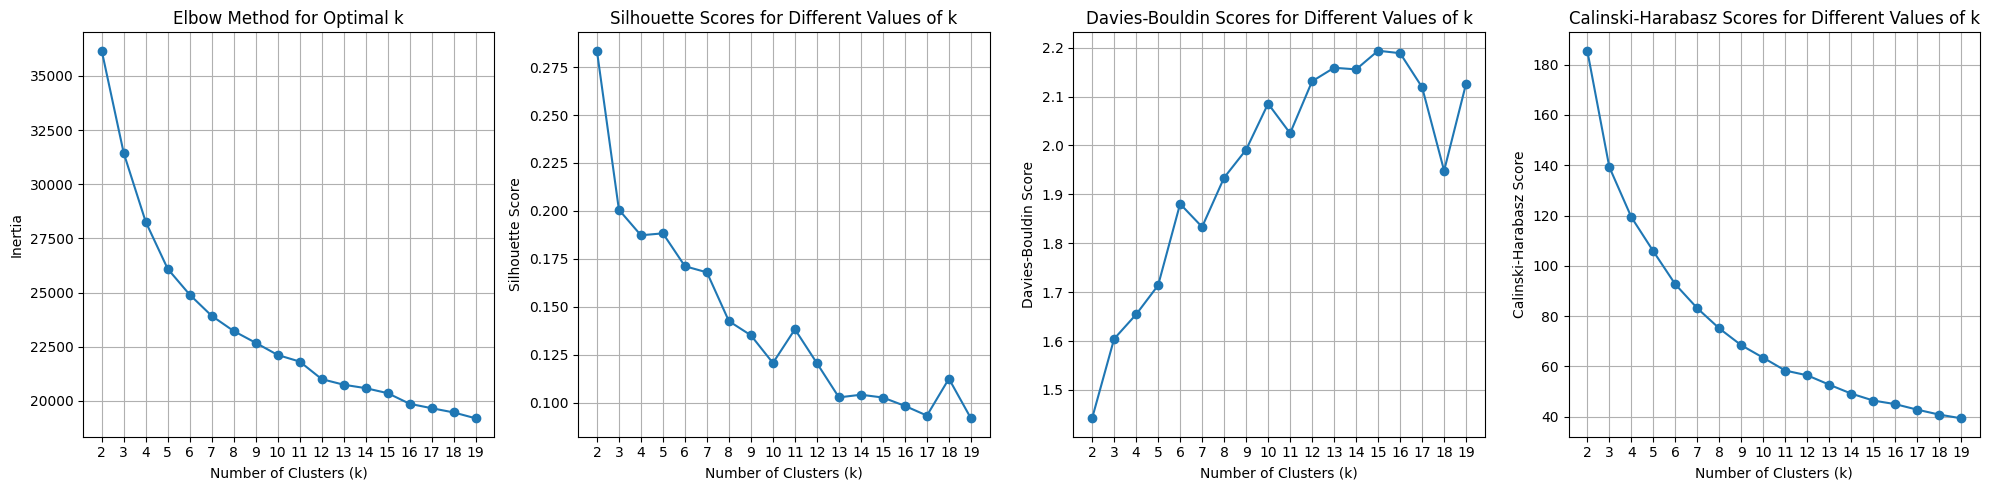

Best k according to Elbow Method: 11
Best k according to Silhouette Score: 2
Best k according to Davies-Bouldin Score: 2
Best k according to Calinski-Harabasz Score: 2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Select features for clustering (exclude categorical columns)
features = outfield_df.drop(columns=['Player'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Ensure selected players exist before computing centroids
selected_players = ["Kevin De Bruyne", "Virgil van Dijk", "Erling Haaland"]
existing_players = outfield_df[outfield_df["Player"].isin(selected_players)].copy()

if len(existing_players) < len(selected_players):
    print(f"Warning: Not all selected players exist in dataset! Found {len(existing_players)}.")

# Drop categorical columns from existing players
numeric_features = existing_players.drop(columns=['Player' ])

# Standardize existing player stats **before computing centroids**
scaled_existing_players = scaler.transform(numeric_features)

# Compute centroid values for known archetypes
centroids = np.array(scaled_existing_players)

# Fit KMeans using expert-chosen centroids
k_means = KMeans(n_clusters=centroids.shape[0], init=centroids, n_init=1, random_state=42)
k_means.fit(scaled_features)

# Get cluster labels
labels = k_means.labels_
print("Custom Initial Cluster Centers:\n", k_means.cluster_centers_)

# Range of k values to try
k_values = range(2, 20)
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Loop through different values of k
for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
    k_means.fit(scaled_features)
    labels = k_means.labels_
    
    inertia.append(k_means.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(scaled_features, labels))

# Plot the evaluation metrics
plt.figure(figsize=(20, 5))

# Plot the inertia values (Elbow Method)
plt.subplot(1, 4, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot the silhouette scores
plt.subplot(1, 4, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

# Plot the Davies-Bouldin scores
plt.subplot(1, 4, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_values)
plt.grid(True)

# Plot the Calinski-Harabasz scores
plt.subplot(1, 4, 4)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

# Function to find the elbow point
def find_elbow_point(inertia):
    diff = np.diff(inertia)
    diff_r = diff[1:] / diff[:-1]
    elbow_point = np.argmin(diff_r) + 2  # +2 because diff reduces the length by 1 and we start from k=2
    return elbow_point

# Find the best k for each metric
best_k_elbow = find_elbow_point(inertia)
best_k_silhouette = k_values[np.argmax(silhouette_scores)]
best_k_davies_bouldin = k_values[np.argmin(davies_bouldin_scores)]
best_k_calinski_harabasz = k_values[np.argmax(calinski_harabasz_scores)]

print(f"Best k according to Elbow Method: {best_k_elbow}")
print(f"Best k according to Silhouette Score: {best_k_silhouette}")
print(f"Best k according to Davies-Bouldin Score: {best_k_davies_bouldin}")
print(f"Best k according to Calinski-Harabasz Score: {best_k_calinski_harabasz}")

# Classification

## KNN

In [ ]:
# Manually specify certain players and their archetypes
player_archetypes = {
    'Trent Alexander-Arnold' : 'Wing Back'
}

# Add a new column for archetypes and label the specified players
outfield_df['Archetype'] = outfield_df['Player'].map(player_archetypes)

# Separate the labeled and un_labelled data
labeled_data = outfield_df.dropna(subset=['Archetype']).copy()
un_labelled_data = outfield_df[outfield_df['Archetype'].isna()].copy()

# continue...